In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# --- load data ---
path = "data/vel_histogramB3.csv" 
df = pd.read_csv(path, comment="#", skipinitialspace=True)

# v = df["v_center"].to_numpy(float)

# prefer provided PDF; otherwise convert counts -> PDF
if "density" in df.columns:
    density = df["density"].to_numpy(float)
else:
    count = df["count"].to_numpy(float)
    binw = np.median(np.diff(v))
    density = count / (count.sum() * binw)

# clean + normalize by area (robust to rounding)
mask = np.isfinite(v) & np.isfinite(density) & (density >= 0)
v = v[mask]
density = density[mask]
density /= np.trapezoid(density, v)

# --- fit MB (m=kB=1) ---
m = 1.0
kB = 1.0
v2 = np.trapezoid(density * v**2, v)  # <v^2>

T3 = m * v2 / (3 * kB)  # 3D
T2 = m * v2 / (2 * kB)  # 2D (for reference)

def mb_3d(x, m, kB, T):
    return ((m/(2*np.pi*kB*T))**1.5) * 4*np.pi * x**2 * np.exp(-m*x**2/(2*kB*T))

def mb_2d(x, m, kB, T):
    return (m/(kB*T)) * x * np.exp(-m*x**2/(2*kB*T))

mb3 = mb_2d(v, m, kB, T3); mb3 /= np.trapezoid(mb3, v)
# mb2 = mb_2d(v, m, kB, T2); mb2 /= np.trapz(mb2, v)

# --- plot ---
plt.figure()
plt.plot(v, density, label="Velocity Distribution")
plt.plot(v, mb3, label=f"Maxwell-Boltzmann Distribution")
# plt.plot(v, mb2, label=f"MB 2D (T≈{T2:.2f})")
plt.xlabel("Velocity center")
plt.ylabel("Probability density")
plt.xlim(0,10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Velocity_distribution_B3.png")
plt.show()

NameError: name 'pd' is not defined

C:\Users\lukas\AppData\Local\Temp\ipykernel_10904\1069517017.py:4: RuntimeWarning: divide by zero encountered in divide
  chi = (1/N_A) * (np.log((1-phi_A)/phi_A))/(1-2*phi_A)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10904\1069517017.py:4: RuntimeWarning: divide by zero encountered in log
  chi = (1/N_A) * (np.log((1-phi_A)/phi_A))/(1-2*phi_A)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10904\1069517017.py:4: RuntimeWarning: invalid value encountered in divide
  chi = (1/N_A) * (np.log((1-phi_A)/phi_A))/(1-2*phi_A)


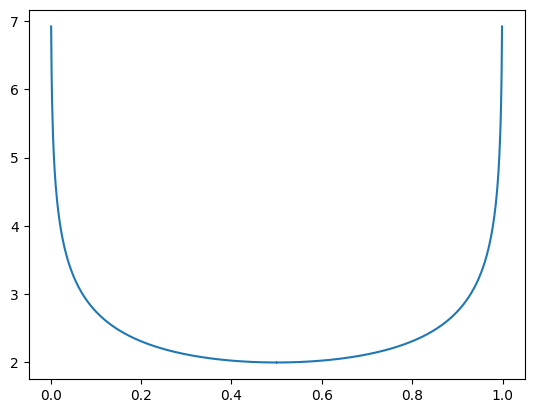

In [ ]:
N_A = 1
phi_A = np.linspace(0,1,1001)

chi = (1/N_A) * (np.log((1-phi_A)/phi_A))/(1-2*phi_A)

plt.figure()
plt.plot(phi_A, chi)

plt.show()